In [2]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path

path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update("rise", {"scroll": True})

{'scroll': True}

# Tri & Health Data 

# Calorie ML Model

# Story and Background

## Raw Dataset


<table>
    <tr>
        <td><img src='bike.jpg' alt='Your Image' width='300' height='80'></td>
        <td>
            <ul>
                <li><em>  Uncleaned</em></li>
                <li><em>  Not Processed</em></li>
                <li><em>  Not Trained</em></li>
                <li><em>  No Target y</em></li>
                <li><em>  .Fit Underfitted</em></li>
            </ul>
        </td>
    </tr>
</table>





## Processed Dataset

<table>
    <tr>
        <td><img src='TT.jpg' alt='Your Image' width='400' height='240'></td>
        <td>
            <ul>
                <li><em>  Cleaned</em></li>
                <li><em>  Processed</em></li>
                <li><em>  .transform .fit</em></li>
                <li><em>  .model</em></li>
                <li><em>  .score .metric</em></li>
                <li><em>  .fit Fine Tuning</em></li>
            </ul>
        </td>
    </tr>
</table>


## 4th Discipline of a Triathlon

Nutrition 

- What to eat?
- Race Weight?
- How much to eat?


Problem Statement! 

How much should one eat that fits around training? 

Wouldnt it be great if there was...
**A Personalised Calorie Requirements for a given Training Day**

<h1>Data Sourcing</h1>

### Collect via manually typing data into a CSV file
<h3>Daily updating and collecting data</h3>



In [3]:
import pandas as pd

df = pd.read_csv('tri_health_data.csv')
df.head(5)

Date  Sleep Activity Type  Activity Duration  TSS  Weight  HRV  \
0  22/05/2017    7.1     Swim, Run              125.0  154    87.7  NaN   
1  23/05/2017    6.3          Swim               45.0   78     NaN  NaN   
2  24/05/2017    6.7           NaN                NaN    0     NaN  NaN   
3  25/05/2017    7.6     Swim, Gym              142.0  155     NaN  NaN   
4  26/05/2017    8.7           Run               68.0   60     NaN  NaN   

     Steps  Cals_burnt    Cals  Carbs  Fats  Protein  Sensation  
0  13894.0      4600.0  3600.0    NaN   NaN    135.0        7.0  
1  12739.0      3459.0  3700.0    NaN   NaN     75.0        4.0  
2   3324.0      2629.0  2210.0    NaN   NaN     75.0        8.0  
3  11532.0      4327.0  4580.0    NaN   NaN    120.0        7.0  
4  10479.0      3363.0  3590.0    NaN   NaN     80.0        9.0

## Data Overview

In [4]:
df.shape, df.size

((1034, 14), 14476)

In [5]:
column_titles = list(df.columns)
column_titles

['Date',
 'Sleep',
 'Activity Type',
 'Activity Duration',
 'TSS',
 'Weight',
 'HRV',
 'Steps',
 'Cals_burnt',
 'Cals',
 'Carbs',
 'Fats',
 'Protein',
 'Sensation']

## Data Overview

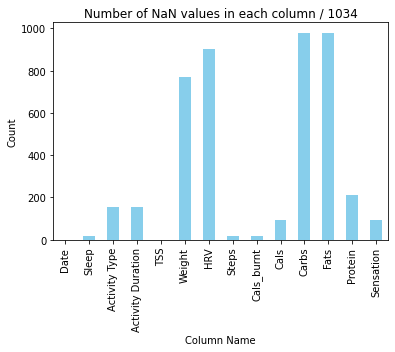

Column Name  Number of NaN Values  Percentage of NaN Values
10              Carbs                   980                     94.78
11               Fats                   980                     94.78
6                 HRV                   900                     87.04
5              Weight                   768                     74.27
12            Protein                   212                     20.50
3   Activity Duration                   156                     15.09
2       Activity Type                   154                     14.89
9                Cals                    93                      8.99
13          Sensation                    93                      8.99
1               Sleep                    18                      1.74
7               Steps                    18                      1.74
8          Cals_burnt                    18                      1.74
0                Date                     0                      0.00
4                 TSS                     0                      0.00

In [6]:
import numpy as np
import matplotlib.pyplot as plt

nan_counts = df.isna().sum()
count_date = df['Date'].count()


nan_counts.plot(kind='bar', color='skyblue')
plt.title(f'Number of NaN values in each column / {count_date}')
plt.ylabel('Count')
plt.xlabel('Column Name')
plt.show()

nan_percentage = (nan_counts / len(df)) * 100

# Create a new DataFrame to store the results
nan_df = pd.DataFrame({
    'Column Name': nan_counts.index,
    'Number of NaN Values': nan_counts.values,
    'Percentage of NaN Values': nan_percentage.round(2).values
})

nan_df = nan_df.sort_values(by='Percentage of NaN Values', ascending=False)

nan_df

## Data Cleaning

### Check for duplicated values in the DataFrame

In [7]:
duplicates = df.duplicated().sum()
duplicates

0

### Columns Carbs Fats and HRV

In [8]:
df.drop(columns=['Fats','Carbs','HRV'], inplace=True)
df.head(5)

Date  Sleep Activity Type  Activity Duration  TSS  Weight    Steps  \
0  22/05/2017    7.1     Swim, Run              125.0  154    87.7  13894.0   
1  23/05/2017    6.3          Swim               45.0   78     NaN  12739.0   
2  24/05/2017    6.7           NaN                NaN    0     NaN   3324.0   
3  25/05/2017    7.6     Swim, Gym              142.0  155     NaN  11532.0   
4  26/05/2017    8.7           Run               68.0   60     NaN  10479.0   

   Cals_burnt    Cals  Protein  Sensation  
0      4600.0  3600.0    135.0        7.0  
1      3459.0  3700.0     75.0        4.0  
2      2629.0  2210.0     75.0        8.0  
3      4327.0  4580.0    120.0        7.0  
4      3363.0  3590.0     80.0        9.0

### Weight

In [9]:
#auto filling in the gaps between me weighing myself 

df['Weight'].fillna(method='ffill', inplace=True)
df['Weight']

0       87.7
1       87.7
2       87.7
3       87.7
4       87.7
        ... 
1029    90.6
1030    90.6
1031    90.6
1032    90.6
1033    90.6
Name: Weight, Length: 1034, dtype: float64

### Protein 

In [10]:
protein_stat = df['Protein'].describe()
protein_stat

count    822.000000
mean      82.907543
std       20.224109
min       70.000000
25%       75.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: Protein, dtype: float64

In [11]:
medium_protein = df['Protein'].median()
medium_protein

80.0

In [12]:
df['Protein'].fillna(value=80, inplace=True)

### Sleep

In [13]:
df=df.dropna(subset=['Sleep'])
df.count()

Date                 1016
Sleep                1016
Activity Type         867
Activity Duration     865
TSS                  1016
Weight               1016
Steps                1016
Cals_burnt           1016
Cals                  941
Protein              1016
Sensation             941
dtype: int64

### Calories

In [14]:
cals_stat = df['Cals'].describe()
cals_stat

count     941.000000
mean     3079.723698
std       841.444255
min      1060.000000
25%      2640.000000
50%      3130.000000
75%      3510.000000
max      6790.000000
Name: Cals, dtype: float64

In [15]:
df['Cals'].fillna(value=df['Cals'].quantile(0.75), inplace=True)

### Sensation

In [16]:
sensation_stat = df['Sensation'].describe()
sensation_stat

count    941.000000
mean       6.850159
std        2.214525
min        1.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Sensation, dtype: float64

In [17]:
df['Sensation'].fillna(value=df['Sensation'].mean(), inplace=True)


### Check up

In [18]:
df.count()

Date                 1016
Sleep                1016
Activity Type         867
Activity Duration     865
TSS                  1016
Weight               1016
Steps                1016
Cals_burnt           1016
Cals                 1016
Protein              1016
Sensation            1016
dtype: int64

In [19]:
missing2rows = df[df['Activity Duration'].isna() & ~df['Activity Type'].isna()]
missing2rows

# i am happy with the missing data for activity types as simply means i did not train that day. 


Date  Sleep Activity Type  Activity Duration  TSS  Weight   Steps  \
237  14/01/2018    8.9     Swim, Run                NaN    0    89.8  3693.0   
251  28/01/2018    6.4     Swim, Gym                NaN    0    89.9  4405.0   

     Cals_burnt    Cals  Protein  Sensation  
237      2025.0  2130.0     80.0        9.0  
251      2752.0  1480.0     75.0        4.0

In [20]:
df = df.drop([237, 251])

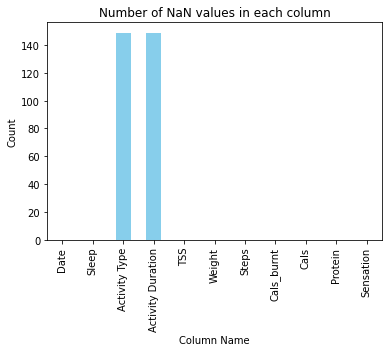

In [21]:
nan_counts = df.isna().sum()
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN values in each column')
plt.ylabel('Count')
plt.xlabel('Column Name')
plt.show()

In [22]:
df['Activity Duration'].fillna(value=0, inplace=True)

df['Activity Type'].fillna(value='Rest_Day', inplace=True)

### Boxplots & Histograms

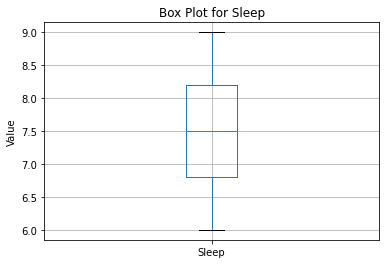

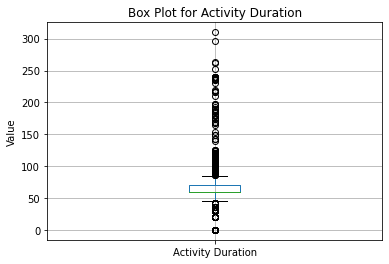

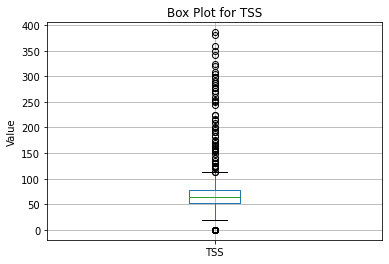

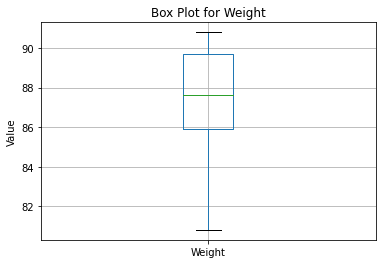

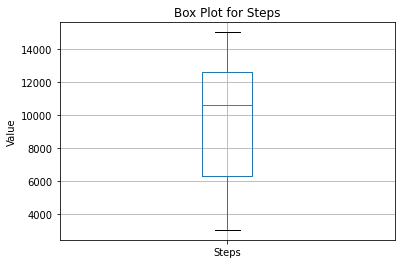

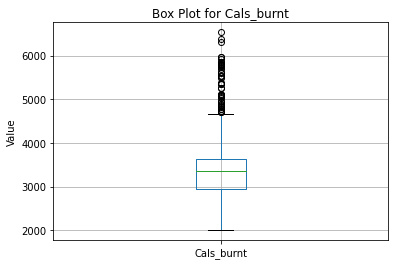

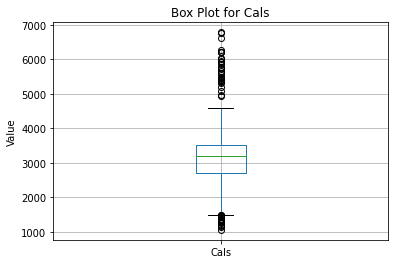

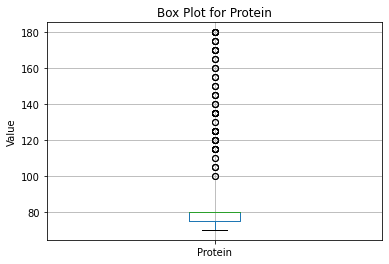

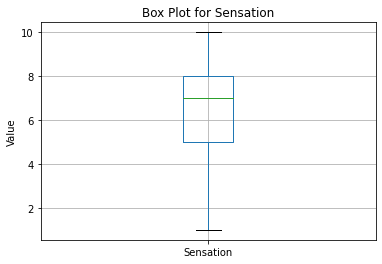

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=[np.number])

for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))  
    df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.ylabel('Value')
    plt.show()

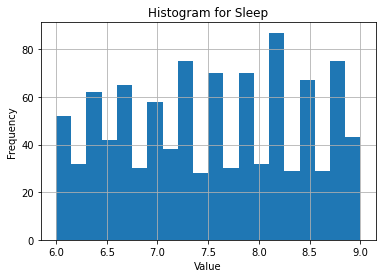

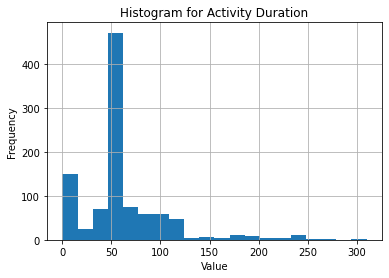

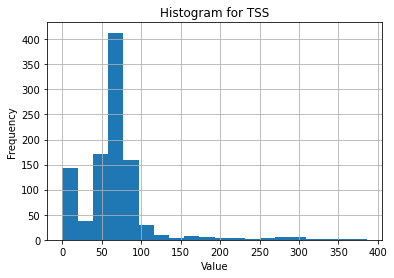

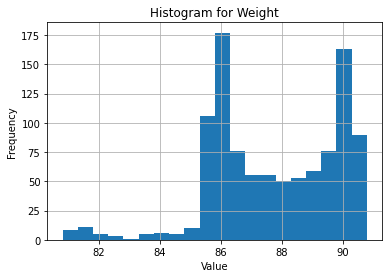

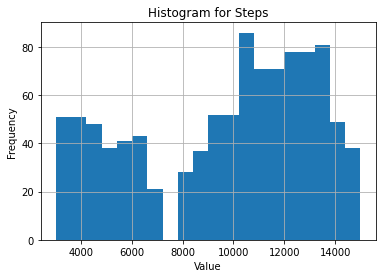

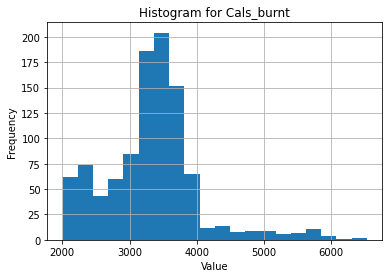

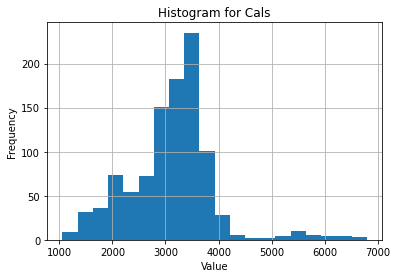

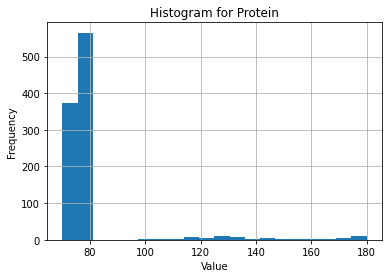

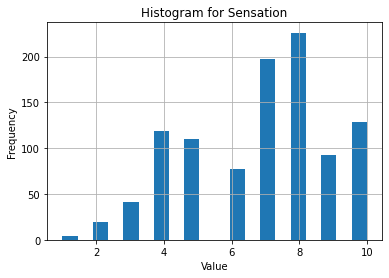

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# can't histogram non numerical values
numeric_columns = df.select_dtypes(include=[np.number])

# create histograms for each numeric column
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))  
    df[column].hist(bins=20)  
    plt.title(f'Histogram for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Train Test Split & PreProcessing

## Split into Training , Testing Dataset

In [25]:
from sklearn.model_selection import train_test_split

# split data into features and target
X = df.drop(columns=['Cals', 'Date'])  
y = df['Cals']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, y_train.shape

((709, 9), (709,))

## Correlations

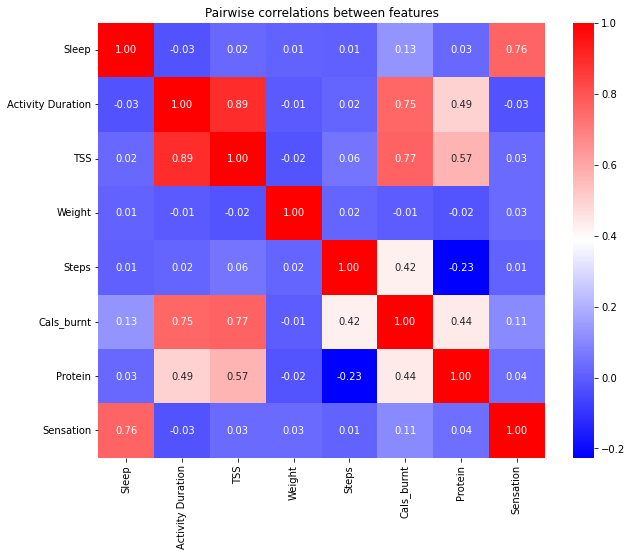

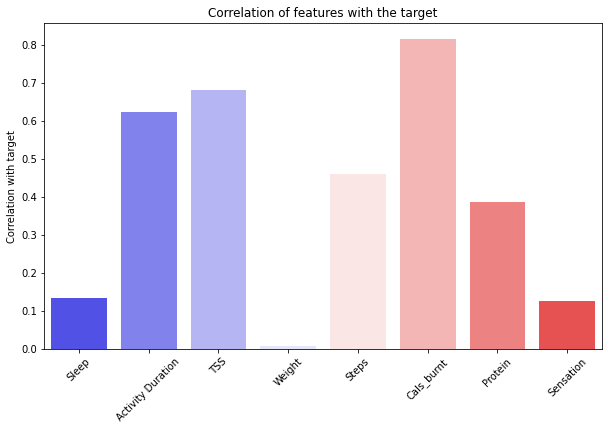

In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pairwise correlations between features (Pearson Correlation)
correlation_matrix = X_train.corr()

# correlation of each feature with y_train
feature_target_corr = X_train.corrwith(y_train)

# heatmap of pairwise correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="bwr", annot=True, fmt=".2f")
plt.title("Pairwise correlations between features")
plt.show()

# now correlations of each feature with respect to y_train
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_target_corr.index, y=feature_target_corr.values, palette="bwr")
plt.title("Correlation of features with the target")
plt.ylabel("Correlation with target")
plt.xticks(rotation=45)
plt.show()


corr_df = correlation_matrix.stack().reset_index()
corr_df.columns = ['feature_1', 'feature_2', 'correlation']

# remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

# Computing the absolute correlation - easier to visual see for us humans
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

In [27]:

threshold = 0.1

# columns to drop from my threshold
columns_to_drop = feature_target_corr[feature_target_corr.abs() < threshold].index.tolist()
print(columns_to_drop)


X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

['Weight']


## PrePrcoessing and Scaling

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
 

# numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()


# Creating transformers
transformers = [
    ('robust', RobustScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical_cols)
]

# Building the column transformer
preprocessor = ColumnTransformer(transformers)

X_train_processed = pd.DataFrame(preprocessor.fit_transform(X_train))

# and preprocess the test data
X_test_processed = preprocessor.transform(X_test)


# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train_processed, y_train)

# Score the model on the preprocessed test data
model.score(X_test_processed, y_test)

0.736732925339381

## Cross Validation Model on Train

In [36]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results_train = cross_validate(model, X_train_processed, y_train, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
print(pd.DataFrame(cv_results_train)) 
print(cv_results_train['test_r2'].mean())

   fit_time  score_time  test_max_error   test_r2  \
0  0.007294    0.002472    -1138.299539  0.789391   
1  0.003383    0.001949    -1766.185290  0.705138   
2  0.002242    0.001706    -1623.782073  0.647157   
3  0.002090    0.001733    -1635.338812  0.731601   
4  0.002118    0.001781    -2212.873630  0.511955   

   test_neg_mean_absolute_error  test_neg_mean_squared_error  
0                   -295.266725               -142368.304252  
1                   -338.670271               -225653.352784  
2                   -325.454933               -191100.347617  
3                   -315.453077               -162465.403513  
4                   -388.693939               -321921.272303  
0.6770485050883243


## Evaluate the Model on Test data

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error
import pandas as pd

model = LinearRegression()


model.fit(X_train_processed, y_train)
y_test_pred = model.predict(X_test_processed)

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_max_error = max_error(y_test, y_test_pred)

test_metrics = {
    'R2 Score': test_r2,
    'Mean Absolute Error': test_mae,
    'Mean Squared Error': test_mse,
    'Max Error': test_max_error
}

print("\nTest Data Metrics:")
print(pd.DataFrame([test_metrics]))





Test Data Metrics:
   R2 Score  Mean Absolute Error  Mean Squared Error    Max Error
0  0.736733           323.313951       183637.636745  1798.729775


## Checking the performance against other regression models

In [38]:
from pycaret  import regression
from pycaret.regression import compare_models
from skopt import BayesSearchCV
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [40]:
regression.setup(X,target=y ,session_id=42, categorical_features = categorical_cols, numeric_features = numeric_cols)

In [41]:
regression.compare_models()

\
                                                 
Initiated  . . . . . . . . . . . . . . . . . .   
Status     . . . . . . . . . . . . . . . . . .   
Estimator  . . . . . . . . . . . . . . . . . .   

                                            
                                            
Initiated                         21:46:06  
Status                    Fitting 10 Folds  
Estimator  Light Gradient Boosting Machine

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KeyboardInterrupt: 

# XGB Regressor

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

preproc_numerical = make_pipeline(
    RobustScaler())

preproc_categorical = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

preproc = make_column_transformer(
    (preproc_numerical, numeric_cols),
    (preproc_categorical, categorical_cols),
    remainder="drop")

model_xgb = XGBRegressor(max_depth=10, n_estimators=600, learning_rate=0.1)

pipe_xgb = make_pipeline(preproc, model_xgb)


In [54]:
cross_val_score(pipe_xgb,X_train,y_train,cv=5,scoring="r2").mean()

0.769827519493416

## Evaluate the Model on Test data

In [55]:
pipe_xgb.fit(X_train,y_train)
y_pred= pipe_xgb.predict(X_test)
y_pred[0], len(y_pred)

(5741.209, 305)

In [67]:
model_xgb = model.fit(X_train_processed, y_train)

In [68]:
y_test_pred = model_xgb.predict(X_test_processed)

gbrtest_r2 = r2_score(y_test, y_test_pred)
gbrtest_mae = mean_absolute_error(y_test, y_test_pred)
gbrtest_mse = mean_squared_error(y_test, y_test_pred)
gbrtest_max_error = max_error(y_test, y_test_pred)

test_metrics = {
    'R2 Score': gbrtest_r2,
    'Mean Absolute Error': gbrtest_mae,
    'Mean Squared Error': gbrtest_mse,
    'Max Error': gbrtest_max_error
}

print(pd.DataFrame([test_metrics]))


Test Data Metrics:
   R2 Score  Mean Absolute Error  Mean Squared Error    Max Error
0  0.736733           323.313951       183637.636745  1798.729775


# Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

preproc_numerical = make_pipeline(
    RobustScaler())

preproc_categorical = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

preproc = make_column_transformer(
    (preproc_numerical, numeric_cols),
    (preproc_categorical, categorical_cols),
    remainder="drop")


regressor = RandomForestRegressor(n_estimators=100, random_state=42)
pipe_forest = make_pipeline(preproc, regressor)

cross_val_score(pipe_forest,X_train,y_train,cv=5,scoring="r2").mean()

0.7656264108259812

## Evaluate the Model on Test data

In [58]:
pipe_forest.fit(X_train,y_train)
y_pred= pipe_forest.predict(X_test)
y_pred[0], len(y_pred)

(5520.7, 305)

In [70]:
model_forest = model.fit(X_train_processed, y_train)

In [71]:
y_test_pred = model_forest.predict(X_test_processed)

forest_test_r2 = r2_score(y_test, y_test_pred)
forest_test_mae = mean_absolute_error(y_test, y_test_pred)
forest_test_mse = mean_squared_error(y_test, y_test_pred)
forest_test_max_error = max_error(y_test, y_test_pred)

test_metrics = {
    'R2 Score': forest_test_r2,
    'Mean Absolute Error': forest_test_mae,
    'Mean Squared Error': forest_test_mse,
    'Max Error': forest_test_max_error
}

print(pd.DataFrame([test_metrics]))


Test Data Metrics:
   R2 Score  Mean Absolute Error  Mean Squared Error    Max Error
0  0.736733           323.313951       183637.636745  1798.729775


# Compare the Models

In [72]:
linear_train = cv_results_train['test_r2'].mean()
test_r2
xgb_train = cross_val_score(pipe_xgb,X_train,y_train,cv=5,scoring="r2").mean()
gbrtest_r2 
forest_train = cross_val_score(pipe_forest,X_train,y_train,cv=5,scoring="r2").mean()
forest_test_r2 

0.736732925339381

In [74]:
data = {
    'Model': ['linear', 'xgb', 'forest'],
    'Train': [linear_train, xgb_train, forest_train],
    'Test': [test_r2, gbrtest_r2, forest_test_r2]
}

df_compare = pd.DataFrame(data)

df_compare['Train'] = df_compare['Train'].round(3)
df_compare['Test'] = df_compare['Test'].round(3)
df_compare

Model  Train   Test
0  linear  0.677  0.737
1     xgb  0.770  0.737
2  forest  0.766  0.737

## Test the models on new Data

In [75]:
from datetime import date

today = date.today()

new_data = {

    'Date' : today,          
    'Sleep' : 8.1,              
    'Activity Type': 'Run' ,
    'Activity Duration' :  140, 
    'TSS' : 130,              
    'Weight' : 86.8,           
    'Steps' : 8000,           
    'Cals_burnt' : 3154,                         
    'Protein' : 80,    
    'Sensation' : 8.6,
}

new_data_df = pd.DataFrame([new_data])
new_data_df

Date  Sleep Activity Type  Activity Duration  TSS  Weight  Steps  \
0  2023-10-24    8.1           Run                140  130    86.8   8000   

   Cals_burnt  Protein  Sensation  
0        3154       80        8.6

In [76]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

preproc_numerical = make_pipeline(
    RobustScaler())

preproc_categorical = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

preproc = make_column_transformer(
    (preproc_numerical, numeric_cols),
    (preproc_categorical, categorical_cols),
    remainder="drop")

model = LinearRegression()

pipe_linear = make_pipeline(preproc, model)
pipe_linear.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Sleep', 'Activity Duration',
                                                   'TSS', 'Steps', 'Cals_burnt',
                                                   'Protein', 'Sensation']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Activity Type'])])),
                ('linearregression', LinearRegression())])

## Predict the new y-target Calories from each model from new input data

In [78]:
y_pred_forest= pipe_forest.predict(new_data_df)
y_pred_xgb = pipe_xgb.predict(new_data_df)
y_pred_linear = pipe_linear.predict(new_data_df)
y_pred_forest,y_pred_xgb, y_pred_linear

(array([2983.6]), array([3545.1743], dtype=float32), array([3392.11601689]))

In [79]:
new_data_values = (3371, 2918, 3124)
df_compare['new_data_predict'] = new_data_values
df_compare

Model  Train   Test  new_data_predict
0  linear  0.677  0.737              3371
1     xgb  0.770  0.737              2918
2  forest  0.766  0.737              3124

# Exploration work 

In [111]:
import pandas as pd

df = pd.read_csv('tri_health_data.csv')
df.drop(columns=['Fats', 'Carbs', 'HRV'], inplace=True)

# 2. Forward-fill the missing values in the 'Weight' column.
df['Weight'].fillna(method='ffill', inplace=True)

# 3. Fill the missing values in the 'Protein' column with its median, or with 80 if the median is NaN.
protein_median = df['Protein'].median()
if pd.isna(protein_median):
    df['Protein'].fillna(value=80, inplace=True)
else:
    df['Protein'].fillna(value=protein_median, inplace=True)

# 4. Fill any missing values in the 'Cals' column with its 75th percentile value.
df['Cals'].fillna(value=df['Cals'].quantile(0.75), inplace=True)

# 5. Fill any missing values in the 'Sensation' column with its mean value.
df['Sensation'].fillna(value=df['Sensation'].mean(), inplace=True)

# 6. Identify and drop rows where 'Activity Duration' is NaN but 'Activity Type' is not NaN.
rows_to_drop = df[df['Activity Duration'].isna() & ~df['Activity Type'].isna()].index
rows_dropped_count = len(rows_to_drop)
df.drop(rows_to_drop, inplace=True)

# 7. change NaN to value 0
df['Activity Duration'].fillna(value=0, inplace=True)

df['Activity Type'].fillna(value='Rest_Day', inplace=True)

df = df.dropna(subset=['Sleep', 'Steps', 'Cals_burnt'])
df

Date  Sleep Activity Type  Activity Duration  TSS  Weight  \
0     22/05/2017    7.1     Swim, Run              125.0  154    87.7   
1     23/05/2017    6.3          Swim               45.0   78    87.7   
2     24/05/2017    6.7      Rest_Day                0.0    0    87.7   
3     25/05/2017    7.6     Swim, Gym              142.0  155    87.7   
4     26/05/2017    8.7           Run               68.0   60    87.7   
...          ...    ...           ...                ...  ...     ...   
1029  16/03/2020    8.0          Swim               60.0   60    90.6   
1030  17/03/2020    8.1          Swim               60.0   67    90.6   
1031  18/03/2020    6.6      Rest_Day                0.0    0    90.6   
1032  19/03/2020    8.4     Swim, Run               60.0   68    90.6   
1033  20/03/2020    7.6      Rest_Day                0.0    0    90.6   

        Steps  Cals_burnt    Cals  Protein  Sensation  
0     13894.0      4600.0  3600.0    135.0        7.0  
1     12739.0      3459.0  3700.0     75.0        4.0  
2      3324.0      2629.0  2210.0     75.0        8.0  
3     11532.0      4327.0  4580.0    120.0        7.0  
4     10479.0      3363.0  3590.0     80.0        9.0  
...       ...         ...     ...      ...        ...  
1029  11490.0      3414.0  3250.0     75.0       10.0  
1030  11011.0      3405.0  2870.0     75.0        8.0  
1031   6475.0      2091.0  1790.0     80.0        6.0  
1032  11595.0      3543.0  3780.0     80.0        9.0  
1033   4672.0      2468.0  1960.0     80.0        8.0  

[1014 rows x 11 columns]

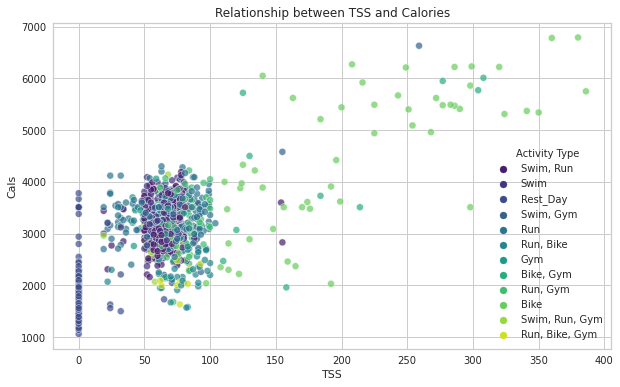

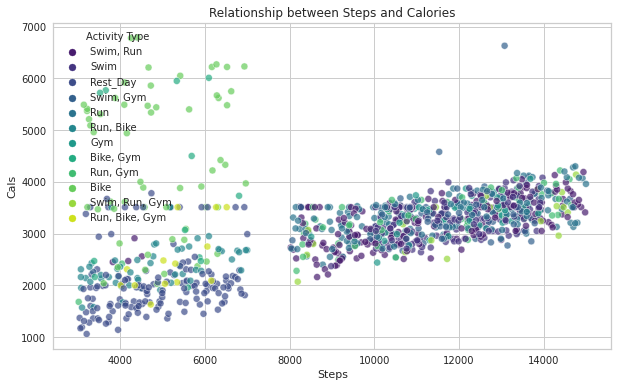

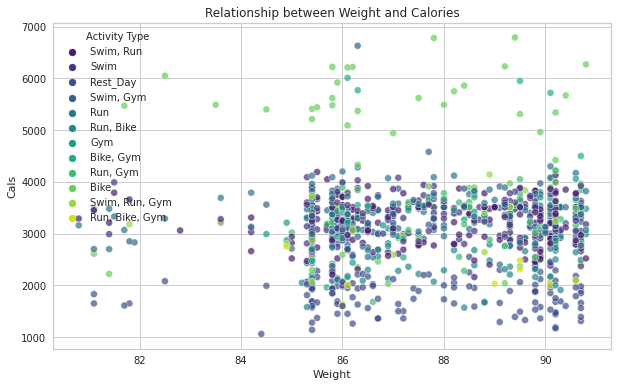

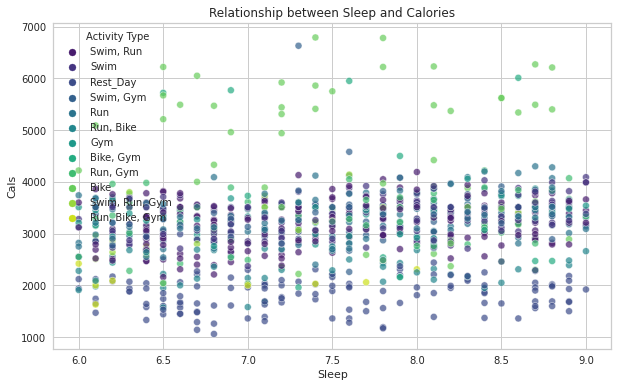

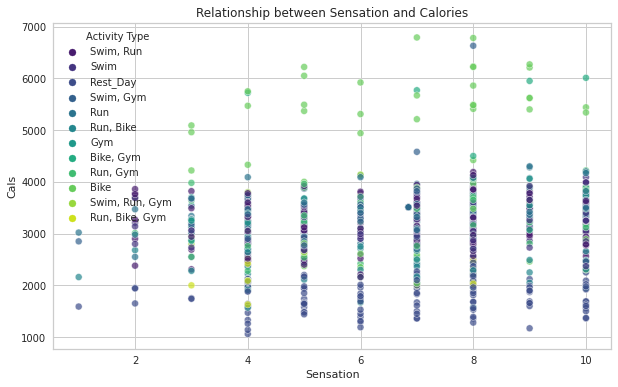

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_of_interest = ['TSS', 'Steps', 'Weight', 'Sleep', 'Sensation']

for var in variables_of_interest:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var, y='Cals', hue='Activity Type', palette='viridis', alpha=0.7)
    plt.title(f'Relationship between {var} and Calories')
    plt.show()

## Notice Activity Type by Cals

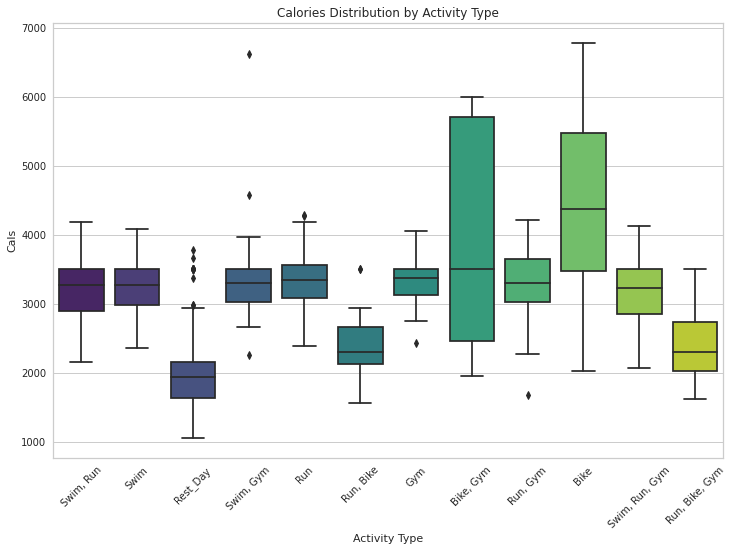

In [113]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Activity Type', y='Cals', palette='viridis')
plt.title('Calories Distribution by Activity Type')
plt.xticks(rotation=45) 
plt.show()

## Clustering k-means see how can relate to Activity Type

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df['Activity Type'] = df['Activity Type'].str.split(', ')
encoded = pd.get_dummies(df['Activity Type'].apply(pd.Series).stack()).sum(level=0)
df = pd.concat([df, encoded], axis=1)

df_filtered = df[(df['Bike'] == 1) | (df['Rest_Day'] == 1)]


scaler = StandardScaler()
df_filtered['Cals_scaled'] = scaler.fit_transform(df_filtered[['Cals']])

# 5. Clustering
kmeans = KMeans(n_clusters=2)
df_filtered['cluster'] = kmeans.fit_predict(df_filtered[['Bike', 'Rest_Day', 'Cals_scaled']])

print(df_filtered[['Date', 'Activity Type', 'Cals', 'cluster']])

            Date Activity Type    Cals  cluster
2     24/05/2017    [Rest_Day]  2210.0        1
5     27/05/2017   [Run, Bike]  2220.0        1
11    02/06/2017    [Rest_Day]  1360.0        1
12    03/06/2017   [Bike, Gym]  2540.0        1
16    07/06/2017    [Rest_Day]  1640.0        1
...          ...           ...     ...      ...
1020  07/03/2020        [Bike]  2810.0        1
1024  11/03/2020    [Rest_Day]  1850.0        1
1027  14/03/2020        [Bike]  3480.0        0
1031  18/03/2020    [Rest_Day]  1790.0        1
1033  20/03/2020    [Rest_Day]  1960.0        1

[286 rows x 4 columns]


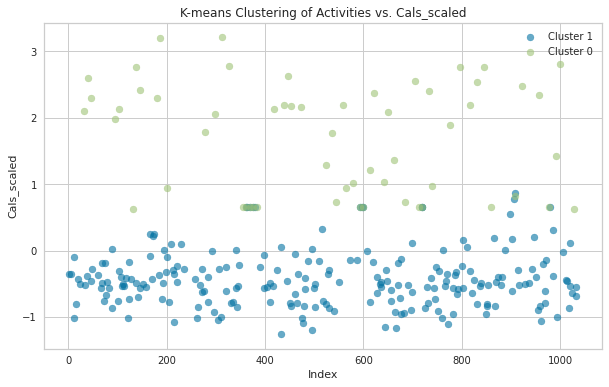

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# i tried 3 clusters but 2 seems best here
kmeans = KMeans(n_clusters=2)
df_filtered['cluster'] = kmeans.fit_predict(df_filtered[['Bike', 'Rest_Day', 'Cals_scaled']])

# Plotting
plt.figure(figsize=(10,6))
for cluster in df_filtered['cluster'].unique():
    subset = df_filtered[df_filtered['cluster'] == cluster]
    plt.scatter(subset.index, subset['Cals_scaled'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-means Clustering of Activities vs. Cals_scaled')
plt.xlabel('X-axis')
plt.ylabel('Cals_scaled')
plt.legend()
plt.grid(True)
plt.show()

## Now to apply all Activity Types to Clustering

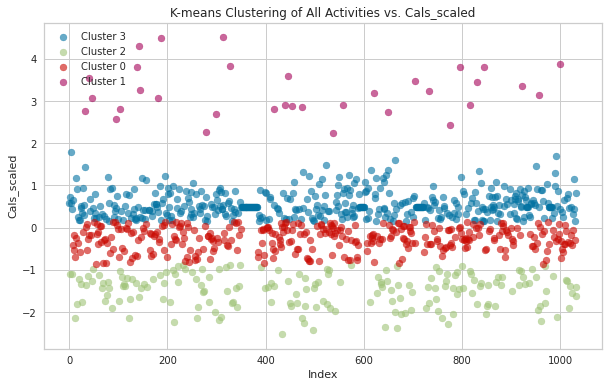

In [96]:
df['Activity Type'] = df['Activity Type'].str.split(', ')
encoded = pd.get_dummies(df['Activity Type'].apply(pd.Series).stack()).sum(level=0)
df = pd.concat([df, encoded], axis=1)


scaler = StandardScaler()
df['Cals_scaled'] = scaler.fit_transform(df[['Cals']])


# 4 seems the best no. here
activity_columns = encoded.columns.tolist()
kmeans = KMeans(n_clusters=4) 
df['cluster'] = kmeans.fit_predict(df[activity_columns + ['Cals_scaled']])


plt.figure(figsize=(10,6))
for cluster in df['cluster'].unique():
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset.index, subset['Cals_scaled'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-means clustering of all Activities vs. Cals_scaled')
plt.xlabel('X-axis')
plt.ylabel('Cals_scaled')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
cluster_df = df[['Bike','Gym','Rest_Day','Run','Swim','cluster']]
cluster_df

Bike  Gym  Rest_Day  Run  Swim  cluster
0        0    0         0    1     1        3
1        0    0         0    0     1        3
2        0    0         1    0     0        2
3        0    1         0    0     1        3
4        0    0         0    1     0        3
...    ...  ...       ...  ...   ...      ...
1029     0    0         0    0     1        3
1030     0    0         0    0     1        0
1031     0    0         1    0     0        2
1032     0    0         0    1     1        3
1033     0    0         1    0     0        2

[1014 rows x 6 columns]

## Visually  applying the clustering to the Activity

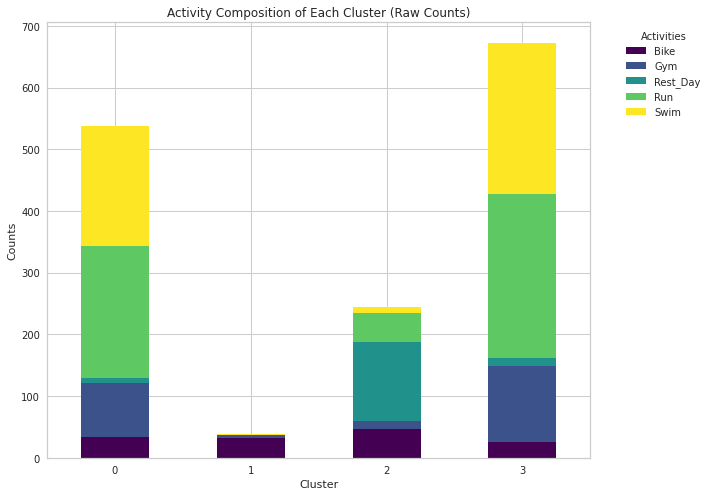

         Bike    Gym  Rest_Day    Run   Swim
cluster                                     
0        34.0   88.0       7.0  215.0  193.0
1        32.0    5.0       0.0    0.0    1.0
2        46.0   13.0     128.0   48.0    9.0
3        25.0  123.0      14.0  266.0  244.0


In [98]:
cluster_activity = cluster_df.groupby('cluster').sum()

ax = cluster_activity.plot(kind='bar', stacked=True, figsize=(10,7), cmap="viridis")
plt.title('Activity Composition of Each Cluster (Raw Counts)')
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend(title="Activities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# also displaying in a table
print(cluster_activity)

In [102]:
import pandas as pd

df = pd.read_csv('tri_health_data.csv')
df.drop(columns=['Fats', 'Carbs', 'HRV'], inplace=True)

# 2. Forward-fill the missing values in the 'Weight' column.
df['Weight'].fillna(method='ffill', inplace=True)

# 3. Fill the missing values in the 'Protein' column with its median, or with 80 if the median is NaN.
protein_median = df['Protein'].median()
if pd.isna(protein_median):
    df['Protein'].fillna(value=80, inplace=True)
else:
    df['Protein'].fillna(value=protein_median, inplace=True)

# 4. Fill any missing values in the 'Cals' column with its 75th percentile value.
df['Cals'].fillna(value=df['Cals'].quantile(0.75), inplace=True)

# 5. Fill any missing values in the 'Sensation' column with its mean value.
df['Sensation'].fillna(value=df['Sensation'].mean(), inplace=True)

# 6. Identify and drop rows where 'Activity Duration' is NaN but 'Activity Type' is not NaN.
rows_to_drop = df[df['Activity Duration'].isna() & ~df['Activity Type'].isna()].index
rows_dropped_count = len(rows_to_drop)
df.drop(rows_to_drop, inplace=True)

# 7. change NaN to value 0
df['Activity Duration'].fillna(value=0, inplace=True)

df['Activity Type'].fillna(value='Rest_Day', inplace=True)

df = df.dropna(subset=['Sleep', 'Steps', 'Cals_burnt'])
df = df.drop(columns=['Date'])

df

Sleep Activity Type  Activity Duration  TSS  Weight    Steps  \
0       7.1     Swim, Run              125.0  154    87.7  13894.0   
1       6.3          Swim               45.0   78    87.7  12739.0   
2       6.7      Rest_Day                0.0    0    87.7   3324.0   
3       7.6     Swim, Gym              142.0  155    87.7  11532.0   
4       8.7           Run               68.0   60    87.7  10479.0   
...     ...           ...                ...  ...     ...      ...   
1029    8.0          Swim               60.0   60    90.6  11490.0   
1030    8.1          Swim               60.0   67    90.6  11011.0   
1031    6.6      Rest_Day                0.0    0    90.6   6475.0   
1032    8.4     Swim, Run               60.0   68    90.6  11595.0   
1033    7.6      Rest_Day                0.0    0    90.6   4672.0   

      Cals_burnt    Cals  Protein  Sensation  
0         4600.0  3600.0    135.0        7.0  
1         3459.0  3700.0     75.0        4.0  
2         2629.0  2210.0     75.0        8.0  
3         4327.0  4580.0    120.0        7.0  
4         3363.0  3590.0     80.0        9.0  
...          ...     ...      ...        ...  
1029      3414.0  3250.0     75.0       10.0  
1030      3405.0  2870.0     75.0        8.0  
1031      2091.0  1790.0     80.0        6.0  
1032      3543.0  3780.0     80.0        9.0  
1033      2468.0  1960.0     80.0        8.0  

[1014 rows x 10 columns]

## Seeking patterns within the whole dataset

In [103]:
encoder = OneHotEncoder(drop='first')
activity_encoded = encoder.fit_transform(df[['Activity Type']]).toarray()
activity_df = pd.DataFrame(activity_encoded, columns=encoder.get_feature_names(['Activity Type']))


df = pd.concat([df, activity_df], axis=1)
df.drop('Activity Type', inplace=True, axis=1)

In [104]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_array, columns=df.columns)


In [ ]:
df_scaled.dropna(inplace=True)

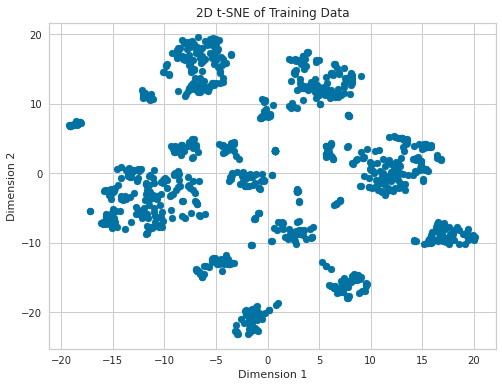

In [106]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)
tsne_results = tsne.fit_transform(df_scaled)
tsne_df = pd.DataFrame(data=tsne_results, columns=['Dimension 1', 'Dimension 2'])

# displaying the t-SNE results
plt.figure(figsize=(8,6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE of df')
plt.show()

## Elbow Method for optimum Kmeans

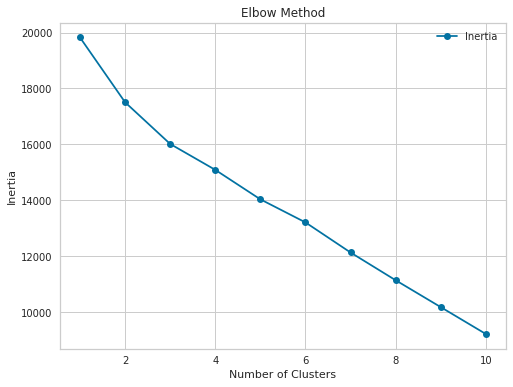

In [107]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, 'o-', label="Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.legend()
plt.show()


## Final t-SNE Clustering clear signs for futher exploration

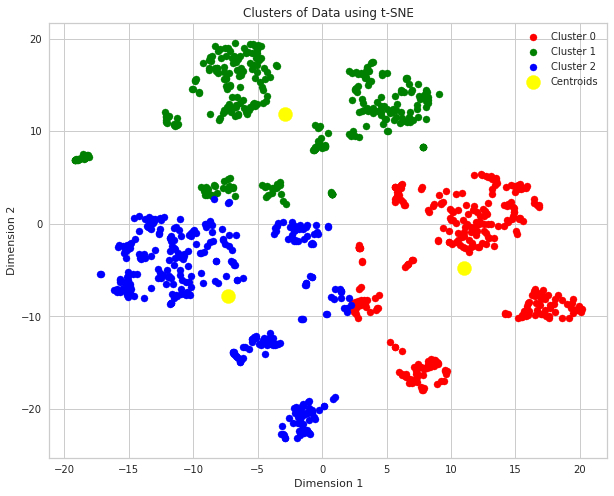

In [108]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_tsne = kmeans.fit_predict(tsne_df)
tsne_df['Cluster'] = clusters_tsne

# again viewing the Clusters but now with centroids 
plt.figure(figsize=(10,8))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(tsne_df[tsne_df['Cluster'] == i]['Dimension 1'], 
                tsne_df[tsne_df['Cluster'] == i]['Dimension 2'], 
                s = 50, c = colors[i], label = f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('Clusters of Data using t-SNE')
plt.show()

# Note - Data sourcing via garmin's or training peak's API is not public available , currently developing App in Android Studio to submit data to my AWS PostgreSQL database, far smoother than typing in excel!!

# Thank you - any questions ?